In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


In [2]:
import matplotlib.pyplot as plt
df_excel = pd.read_excel('/kaggle/input/demo-knes381/VO2_excel.xlsx')

In [3]:
df_excel.head()

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/CO2,PetCO2,Power
0,NaN,STPD,STPD,NaN,STPD,BTPS,NaN,NaN,BTPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,min,L/min,ml/kg/m,NaN,L/min,L/min,NaN,BPM,L,%,%,bpm,BT/ST,BT/ST,mmHg,Watts
2,----------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.517167,0.247651,4.552413,1.300690,0.18422,19.603882,0.743868,17.402514,1.126497,19.247952,1.36228,82,79.15921,106.415611,10.536668,50
4,1.052167,0.687631,12.640276,3.611507,0.524605,19.488014,0.762917,22.429905,0.868841,16.212049,3.827807,84,28.340801,37.147957,25.49148,50


In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    57 non-null     object 
 1   VO2     57 non-null     object 
 2   VO2/kg  57 non-null     object 
 3   METS    55 non-null     float64
 4   VCO2    57 non-null     object 
 5   VE      57 non-null     object 
 6   RER     55 non-null     float64
 7   RR      56 non-null     object 
 8   Vt      57 non-null     object 
 9   FEO2    56 non-null     object 
 10  FECO2   56 non-null     object 
 11  HR      56 non-null     object 
 12  VE/VO2  56 non-null     object 
 13  VE/CO2  56 non-null     object 
 14  PetCO2  56 non-null     object 
 15  Power   56 non-null     object 
dtypes: float64(2), object(14)
memory usage: 7.4+ KB


In [5]:
df_excel["TIME"].describe()

count      57
unique     57
top       min
freq        1
Name: TIME, dtype: object

In [6]:
df_excel['RER'].describe()
# doing statistics

count    55.000000
mean      0.886194
std       0.107071
min       0.743728
25%       0.793776
50%       0.868716
75%       0.952358
max       1.110856
Name: RER, dtype: float64

In [7]:
df_excel = pd.read_excel('/kaggle/input/demo-knes381/VO2_excel.xlsx', header = [0, 2], skiprows = [3])

In [8]:
df_excel["HR"].std()

bpm    25.183111
dtype: float64

In [9]:
df2 = df_excel.rename(columns = {'TIME': 'Time (min)'})

In [10]:
df2.head()

,Time (min),VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/CO2,PetCO2,Power
,min,L/min,ml/kg/m,Unnamed: 3_level_1,L/min,L/min,Unnamed: 6_level_1,BPM,L,%,%,bpm,BT/ST,BT/ST,mmHg,Watts
0,0.517167,0.247651,4.552413,1.300690,0.184220,19.603882,0.743868,17.402514,1.126497,19.247952,1.362280,82.0,79.159210,106.415611,10.536668,50
1,1.052167,0.687631,12.640276,3.611507,0.524605,19.488014,0.762917,22.429905,0.868841,16.212049,3.827807,84.0,28.340801,37.147957,25.491480,50
2,1.517833,0.900826,16.559309,4.731231,0.674840,23.455959,0.749134,19.327129,1.213629,15.810433,4.088318,87.0,26.038269,34.757805,27.316362,50
3,2.040500,0.907713,16.685894,4.767398,0.675092,23.951960,0.743728,21.045919,1.138081,15.884157,4.005978,99.0,26.387159,35.479572,26.742533,50
4,2.549000,1.018969,18.731045,5.351727,0.757926,25.988657,0.743817,19.665684,1.321523,15.709504,4.143663,98.5,25.504860,34.289173,27.543495,50


In [11]:
df_excel  = pd.read_excel("/kaggle/input/demo-knes381/VO2_excel.xlsx", header=[0], skiprows=[1,2,3])
df_excel.head()

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/CO2,PetCO2,Power
0,0.517167,0.247651,4.552413,1.300690,0.184220,19.603882,0.743868,17.402514,1.126497,19.247952,1.362280,82.0,79.159210,106.415611,10.536668,50
1,1.052167,0.687631,12.640276,3.611507,0.524605,19.488014,0.762917,22.429905,0.868841,16.212049,3.827807,84.0,28.340801,37.147957,25.491480,50
2,1.517833,0.900826,16.559309,4.731231,0.674840,23.455959,0.749134,19.327129,1.213629,15.810433,4.088318,87.0,26.038269,34.757805,27.316362,50
3,2.040500,0.907713,16.685894,4.767398,0.675092,23.951960,0.743728,21.045919,1.138081,15.884157,4.005978,99.0,26.387159,35.479572,26.742533,50
4,2.549000,1.018969,18.731045,5.351727,0.757926,25.988657,0.743817,19.665684,1.321523,15.709504,4.143663,98.5,25.504860,34.289173,27.543495,50


<AxesSubplot:xlabel='TIME'>

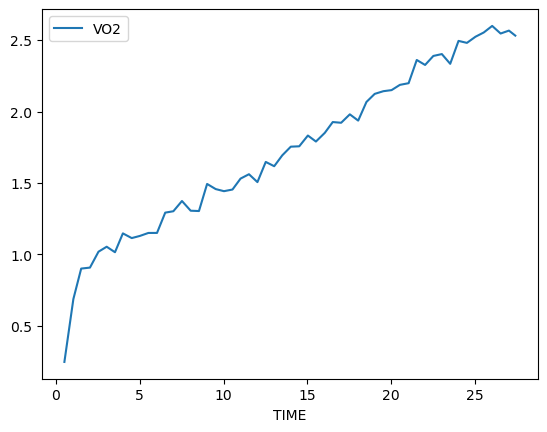

In [12]:
df_excel.plot('TIME', 'VO2')

<AxesSubplot:xlabel='TIME'>

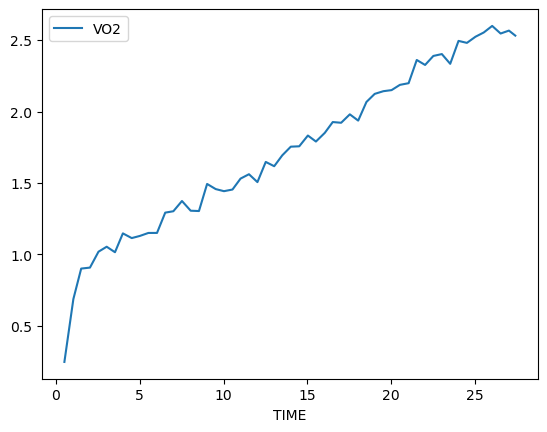

In [13]:
df_excel.plot(x = 0, y = 1)

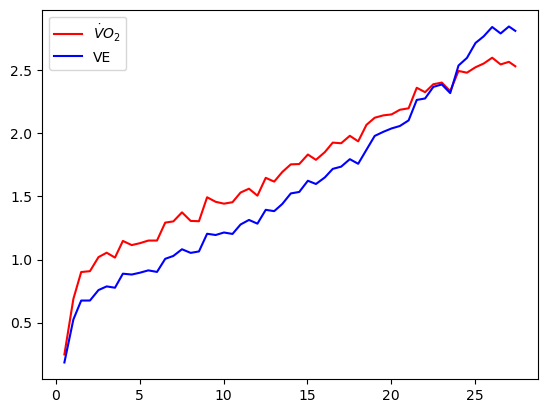

In [14]:
x = df_excel['TIME']
y = df_excel['VO2']
y1 = df_excel['VCO2']
plt.plot(x, y, c = 'r', label = '$\dot VO_2$')
plt.plot(x, y1, c = 'b', label = 'VE')
plt.legend()

<AxesSubplot:title={'center':'Simple $\\dot VO_2$ time plot'}, xlabel='Time (min)', ylabel='$\\dot VO_2 (L/min)$'>

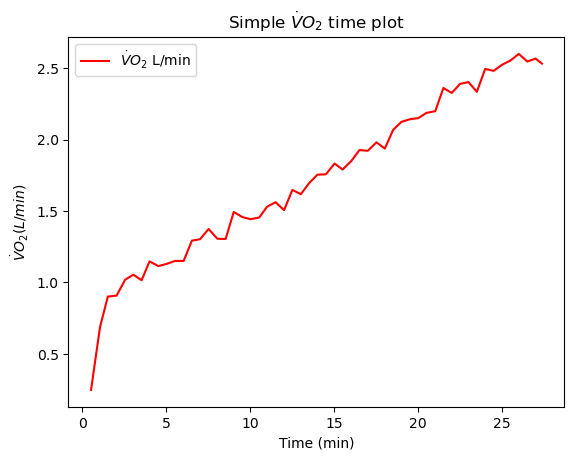

In [15]:
df_excel.plot(x = 0, y = 1, xlabel = 'Time (min)', ylabel = (r'$\dot VO_2 (L/min)$'), label=('$\dot VO_2$ L/min'), title = 'Simple $\dot VO_2$ time plot', c = 'r') 

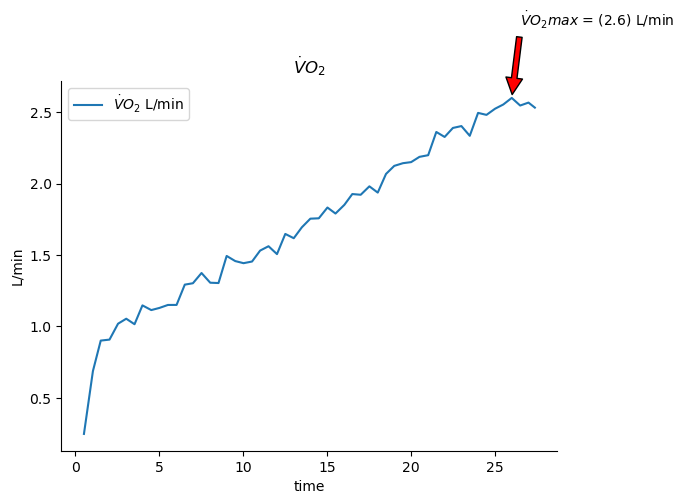

In [16]:
x = df_excel['TIME']
y = df_excel['VO2']

ymax = max(y)
xmax = x[y.argmax()]
fig, ax = plt.subplots()
ax.annotate('$\dot VO_2max$ = ({}) L/min' .format(round(ymax, 2)), xy = (xmax, ymax), xytext = (xmax + .5, ymax + .5),
            arrowprops = dict(facecolor = 'red', shrink = 0.05),
           )

ax.plot(x, y, label = ('$\dot VO_2$ L/min'))
ax.spines[['right', 'top']].set_visible(False)
ax.set(title = ('$\dot VO_2$'), label = ('$\dot VO_2$ L/min'))
ax.set(xlabel = ('time'))
ax.set(ylabel = ('L/min'))
ax.legend()

fig.savefig("test.jpg", dpi = 300, bbox_inches = "tight")

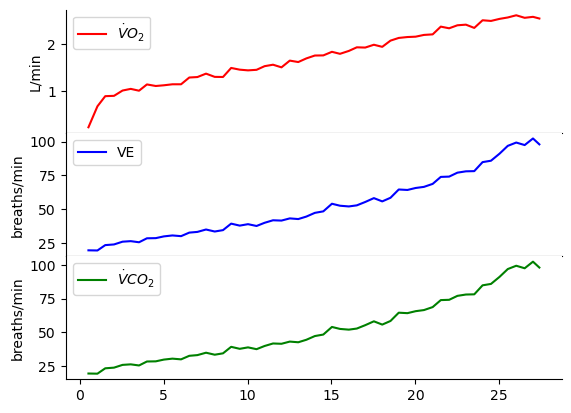

In [17]:
# plotting three graphs

x = df_excel['TIME']
y = df_excel['VO2']
y1 = df_excel['VE']
y2 = df_excel['VCO2']

ymax = max(y)

xmax = x[y.argmax()]

fig, ax = plt.subplots(3, 1, sharex = True)
fig.subplots_adjust(hspace = 0)

# ax[0].annotate('$\dot VO_2max$ = ({}) L/min'.format(round(ymax, 2)), xy = (xmax, ymax), )

ax[0].plot(x, y, label = ('$\dot VO_2$'), c = 'r')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel = ('L/min'))
ax[0].legend()

ax[1].plot(x, y1, label = ('VE'), c = 'b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel = ('breaths/min'))
ax[1].legend()

ax[2].plot(x, y1, label = ('$\dot VCO_2$'), c = 'g')
ax[2].spines[['top', 'right']].set_visible(False)
ax[2].set(ylabel = ('breaths/min'))
ax[2].legend()

fig.savefig("test-3.png", dpi = 300, bbox_inches = "tight")